# 线性回归示例程序
这里是一个单变量线性回归算法的演示程序

### 0. 导入必要的包

In [10]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 生成示例数据

In [11]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

### 2. 初始化参数
这里主要就是 w 和 b 的初始化，w 和 b 的初始化方式有很多，这里我们采用最简单的 0 初始化。

In [12]:
#初始化参数
w = 0
b = 0
#设置超参数
learning_rate = 0.1
n_iterations = 100
#存储每次迭代的参数和损失
w_history, b_history, loss_history = [], [], []

### 3. 开始梯度下降算法

这两行代码是计算线性回归模型中参数 w 和 b 的梯度。让我们逐步解析:
1. 梯度的计算:
- 这里使用的是均方误差(MSE)作为损失函数。
- MSE 的公式是: (1/n) Σ(y_pred - y)^2，其中 n 是样本数量。
2. 对 w 的梯度 (dw):
- MSE 对 w 的偏导数是: (2/n) Σ(X (y_pred - y))
- 在这个例子中, n = 100 (样本数量)
- 所以 dw = (2/100) np.sum(X (y_pred - y))
3. 对 b 的梯度 (db):
- MSE 对 b 的偏导数是: (2/n) Σ(y_pred - y)
- 同样, n = 100
- 所以 db = (2/100) np.sum(y_pred - y)
4. np.sum() 函数:
- 用于计算所有样本的梯度之和
5. (2/100) 因子:
- 这是由损失函数的导数和样本数量决定的
- 2 来自平方项的导数
- 100 是样本总数

In [13]:
for i in range(n_iterations):
# 计算预测值
    y_pred = w * X + b
    # 计算梯度
    dw = (2/100) * np.sum(X * (y_pred - y))
    db = (2/100) * np.sum(y_pred - y)
    # 更新参数
    w -= learning_rate * dw
    b -= learning_rate * db
    # 计算损失
    loss = np.mean((y_pred - y) ** 2)
    # 存储历史记录
    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss)

    print(f"Iteration {i+1}: Loss = {loss:.4f}")

Iteration 1: Loss = 50.0083
Iteration 2: Loss = 17.9354
Iteration 3: Loss = 6.8725
Iteration 4: Loss = 3.0497
Iteration 5: Loss = 1.7223
Iteration 6: Loss = 1.2554
Iteration 7: Loss = 1.0857
Iteration 8: Loss = 1.0189
Iteration 9: Loss = 0.9881
Iteration 10: Loss = 0.9703
Iteration 11: Loss = 0.9574
Iteration 12: Loss = 0.9466
Iteration 13: Loss = 0.9370
Iteration 14: Loss = 0.9283
Iteration 15: Loss = 0.9201
Iteration 16: Loss = 0.9125
Iteration 17: Loss = 0.9055
Iteration 18: Loss = 0.8989
Iteration 19: Loss = 0.8927
Iteration 20: Loss = 0.8870
Iteration 21: Loss = 0.8816
Iteration 22: Loss = 0.8766
Iteration 23: Loss = 0.8719
Iteration 24: Loss = 0.8676
Iteration 25: Loss = 0.8635
Iteration 26: Loss = 0.8597
Iteration 27: Loss = 0.8561
Iteration 28: Loss = 0.8528
Iteration 29: Loss = 0.8497
Iteration 30: Loss = 0.8469
Iteration 31: Loss = 0.8442
Iteration 32: Loss = 0.8417
Iteration 33: Loss = 0.8393
Iteration 34: Loss = 0.8371
Iteration 35: Loss = 0.8351
Iteration 36: Loss = 0.8332

### 4. 绘制损失函数随迭代次数的变化


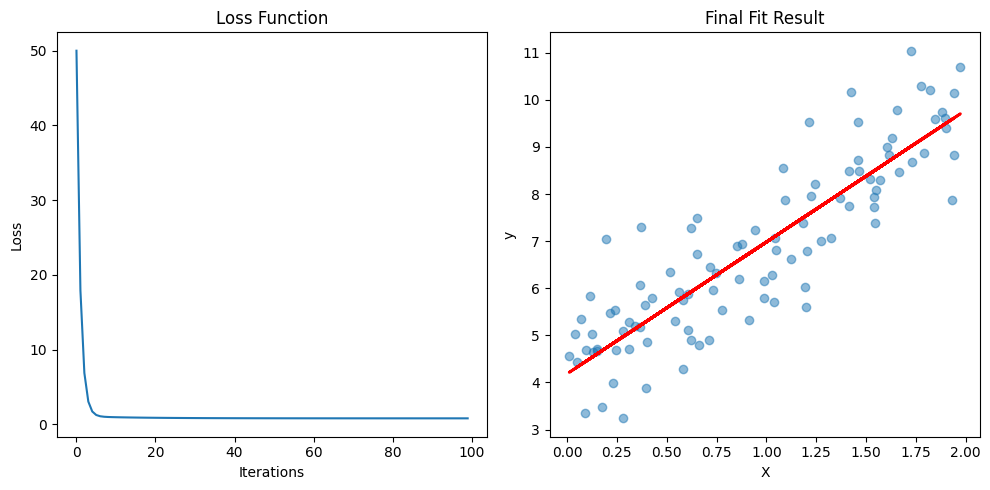

Final Parameters: w = 2.80, b = 4.18


In [14]:
#绘制损失函数随迭代次数的变化
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(loss_history)
plt.title('Loss Function')
plt.xlabel('Iterations')
plt.ylabel('Loss')
#绘制最终的拟合线
plt.subplot(122)
plt.scatter(X, y, alpha=0.5)
plt.plot(X, w * X + b, color='r', linewidth=2)
plt.title('Final Fit Result')
plt.xlabel('X')
plt.ylabel('y')
plt.tight_layout()
plt.show()
print(f"Final Parameters: w = {w:.2f}, b = {b:.2f}")